# Modelo de recomendación

En esta primera versión se realiza un modelo híbrido, el cual tendrá en cuenta las imagenes del producto para generar una lista de productos similares y por otra parte un modelo en base a los comentarios de los usuarios.

In [3]:
import constants
import model
import importlib
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity

importlib.reload(constants)
importlib.reload(model)

<module 'model' from 'd:\\Documentos\\SistemaDeRecomendacion\\model\\model.py'>

## 1) Conversion de imágenes en embeddings

Se llama la función que genera los embeddings de las imágenes y lo guarda en la ruta de salida.

In [5]:
model.extract_image_features(input_path=constants.INPUT_PATH_IMAGES, output_path=constants.OUTPUT_PATH_IMAGES)

1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 

## 2) Conversión de reviews en embedding

Se llama la función que genera los embeddings de los textos y lo guarda en la ruta de salida junto con datos de usuario y producto.

In [8]:
df_reviews_model = model.extract_review_features(constants.INPUT_PATH_REVIEWS, constants.OUTPUT_PATH_REVIEWS)

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.predictions.transform.dense.bias', 'cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions w

In [9]:
print(len(df_reviews_model))

200


In [10]:
df_reviews_model.head()

,dim_0,dim_1,dim_2,dim_3,dim_4,dim_5,dim_6,dim_7,dim_8,dim_9,...,dim_249,dim_250,dim_251,dim_252,dim_253,dim_254,dim_255,customer_id,parent_product_id,review_score
0,0.000000,1.227135,0.000000,0.0,0.0,0.000000,0.0,0.235874,0.072665,0.795760,...,0.739238,1.177583,1.109451,0.088355,0.0,0.077796,0.098982,AEBZIVC6W4SCR7KJONSJICYOVILA,B09KHSM7BB,5.0
1,0.000000,1.242524,0.000000,0.0,0.0,0.033853,0.0,0.000000,0.144716,0.558809,...,0.616611,0.891872,0.332306,0.131186,0.0,0.278067,0.000000,AGUWKEITESK4XURMJ6OFRLAT6RCA,B09TXZHKLG,5.0
2,0.023937,1.147666,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.278280,0.526775,...,0.745967,0.942874,0.318266,0.215017,0.0,0.453005,0.000000,AEH25TSB32JS7K5FIZQLIEKH4I4A,B09KHSM7BB,5.0
3,0.000000,1.226826,0.000000,0.0,0.0,0.070389,0.0,0.000000,0.430582,0.824246,...,0.736791,0.911188,0.331567,0.241944,0.0,0.414836,0.000000,AG3ZLSFL6WEHCXA2SETWSPPDGTVQ,B09H6MXJ71,5.0
4,0.390708,0.930001,0.258586,0.0,0.0,0.000000,0.0,0.285860,0.000000,0.500576,...,0.520068,1.128961,1.336664,0.193697,0.0,0.343897,0.112730,AGTHB57XVFEGHPCQ4EYTWQH7SWHQ,B09M6X79V9,1.0


In [4]:
# REVISION DE MËTRICAS

embedding_text_matrix = pd.read_csv(constants.OUTPUT_PATH_REVIEWS).iloc[:, :256].to_numpy()
similarity_matrix = cosine_similarity(embedding_text_matrix)

df_similarity = pd.DataFrame(similarity_matrix)

# Mostrar la matriz de similitud
print(df_similarity)

          0         1         2         3         4         5         6    \
0    1.000000  0.898203  0.901912  0.867205  0.941678  0.893942  0.888308   
1    0.898203  1.000000  0.961599  0.980083  0.792050  0.988521  0.974779   
2    0.901912  0.961599  1.000000  0.966371  0.830912  0.966758  0.982291   
3    0.867205  0.980083  0.966371  1.000000  0.763038  0.985564  0.984561   
4    0.941678  0.792050  0.830912  0.763038  1.000000  0.793248  0.804628   
..        ...       ...       ...       ...       ...       ...       ...   
195  0.972615  0.893182  0.895302  0.852852  0.930912  0.878434  0.874847   
196  0.873990  0.977992  0.955144  0.981150  0.771459  0.983381  0.970055   
197  0.910752  0.989689  0.977015  0.983498  0.815480  0.988079  0.987167   
198  0.842561  0.962258  0.951091  0.983814  0.749067  0.981120  0.980815   
199  0.862214  0.965339  0.979773  0.983927  0.785695  0.975210  0.987851   

          7         8         9    ...       190       191       192  \
0  

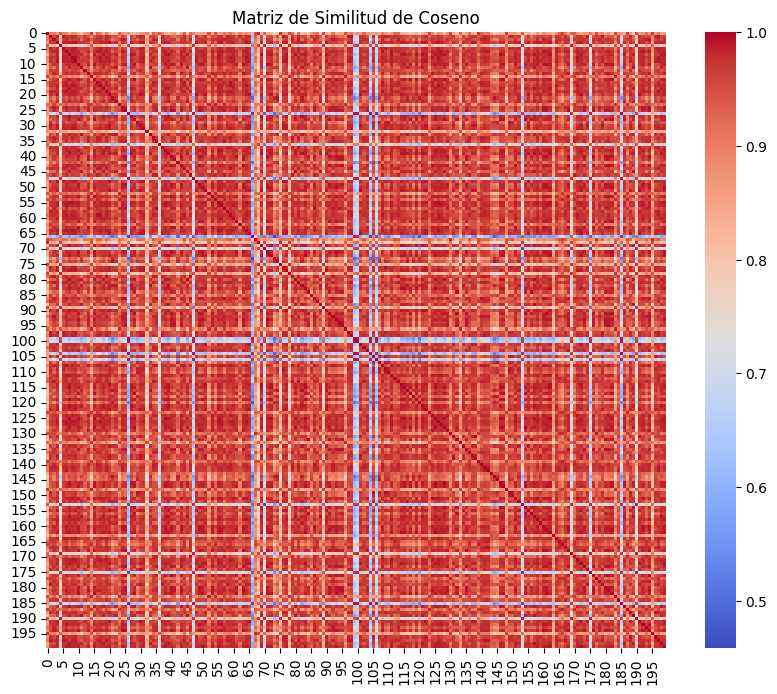

In [5]:
plt.figure(figsize=(10, 8))
sns.heatmap(df_similarity, cmap="coolwarm", annot=False)
plt.title("Matriz de Similitud de Coseno")
plt.show()

Dado que este problema es de tipo NO supervisado, y con el fin de validar el modelo, se pueden usar algunas métricas de similitud como lo es la similitud coseno o también algunas técnicas de clustering.

Para los productos seleccionados, se observa que de acuerdo a este modelo usado, la mayoria son similares entre si, ya que tienen un valor cercano a 1.

Sin embargo, estos valores no son muy representativos, ya que hace falta por ejemplo realizar comparación con otros modelos base. También se puede validar si los productos similares entre sí, son realmente similares, usando algun dato como etiqueta para clasificación.



# 3. Combinación de ambos embeddings para generar recomendaciones.

Se generan los datos de test y train para validación del modelo.

In [4]:
X_train, X_test, y_train, y_test = model.getDataForHybridModel(constants.OUTPUT_PATH_IMAGES, constants.OUTPUT_PATH_REVIEWS)

In [5]:
print("X_train: ", X_train.shape)
print("X_test: ", X_test.shape)
print("y_train: ", y_train.shape)
print("y_test: ", y_test.shape) 

X_train:  (160, 1537)
X_test:  (40, 1537)
y_train:  (160,)
y_test:  (40,)


In [6]:
# Genera el modelo y lo guarda.
model.generateModel(X_train, X_test, y_train, y_test)

d:\Documentos\SistemaDeRecomendacion\envPython11\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 111ms/step - loss: 15.9492 - mae: 3.5838 - val_loss: 1.7700 - val_mae: 1.0181
Epoch 2/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 3.0201 - mae: 1.2989 - val_loss: 1.7875 - val_mae: 1.0801
Epoch 3/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 1.6752 - mae: 1.0416 - val_loss: 2.7136 - val_mae: 1.4643
Epoch 4/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 1.6456 - mae: 1.0839 - val_loss: 2.3233 - val_mae: 1.1717
Epoch 5/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 1.1763 - mae: 0.8052 - val_loss: 1.6981 - val_mae: 0.9389
Epoch 6/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 1.0947 - mae: 0.7701 - val_loss: 2.0967 - val_mae: 1.1500
Epoch 7/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 1.1499 - mae: 0.8453 - val_loss: 1.9295 - val_mae: 1.0189
Epoch 8/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 0.8773 - mae: 0.7104 - val_loss: 1.9838 - val_mae: 1.0938
Epoch 9/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.9669 - mae: 0.7760 

Los resultados del modelo muestran que no está capturando bien la relación entre las variables de entrada y la variable objetivo "review_score".
Un R² de -0.77 indica que el modelo es malo y que no predece bien la media de los datos, lo que sugiere que la red no está aprendiendo patrones significativos. 
Además, el MAE de 1.04 y el RMSE de 1.45 muestran que las predicciones tienen un error considerable en promedio. 

Para mejorar estos resultados, es recomendable revisar el preprocesamiento de los datos, asegurando que las características sean relevantes y estén bien escaladas. También puede ser útil ajustar la arquitectura del modelo, probando diferentes cantidades de capas y neuronas, y utilizando activaciones adecuadas. Otro enfoque es modificar los hiperparámetros, como reducir el learning rate o probar diferentes optimizadores. Adicionalmente, se puede agregar técnicas de regularización, como dropout o penalizaciones L1/L2, podría ayudar a evitar sobreajuste y mejorar la capacidad del modelo para generalizar. Finalmente, comparar con modelos más simples, como regresión lineal, puede dar una referencia sobre si la red neuronal realmente está agregando valor o si se necesita reformular el enfoque del problema.

Finalmente se debe tener muy en cuenta que la cantidad de datos es muy pequeña y por tanto las medidas de validacion van a ser muy malas. Es necesario entrenar el modelo con muchos mas datos.

# 4. Recomendación usando el modelo.

In [27]:
recomendation = model.recomendar_productos("AGBQGWBWT3SXHTNFC2NCEU2W6HHA", constants.OUTPUT_PATH_REVIEWS, constants.OUTPUT_PATH_IMAGES, model_path=constants.OUTPUT_PATH_MODEL, top_n=5)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━

In [28]:
recomendation

[('B0BG5PWPN5',
  "EOSIEDUR Women's Two Piece Outfits Zip Top Jacket and Elastic Waistband Pant Women Sweatsuit Tracksuit Sets",
  2.485177516937256),
 ('B089K67ZGW',
  'DF-deals Womens Silk Satin Pajamas Set Shorts Sleepwear Button Down Two-Piece Nightwear Soft Pj Sets Loungewear Dusty Orange L',
  2.4813292026519775),
 ('B08WC5486P',
  'Women Jogger Outfit Matching Sweat Suits Long Sleeve Hooded Sweatshirt and Sweatpants 2 Piece Sports Sets Tracksuit',
  2.464780330657959),
 ('B07DY3H2XX',
  'YACUN Women Bodycon Dress Cocktail Work Half Sleeve Bow Tie Party Dresses',
  2.446591377258301),
 ('B07VVW4QWJ',
  'LED Purge Mask Light up Scary Halloween Mask for Men Women, Blue, Size Large',
  2.4267539978027344)]

Se observa que el modelo recomienda un top de productos dado un usuario. El resultado es un id de producto y el nombre del producto.